In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [62]:
df = pd.read_csv("data/epi_r.csv")
df2 = pd.read_csv("data/epi_r.csv")

In [63]:
df.shape

(20052, 680)

In [64]:
df['calories'].isnull().values.any()

True

In [65]:
df=df.dropna()

In [66]:
df=df.reset_index()

In [67]:
df.info

<bound method DataFrame.info of        index                                        title  rating  calories   
0          0              Lentil, Apple, and Turkey Wrap    2.500     426.0  \
1          1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0   
2          2                Potato and Fennel Soup Hodge    3.750     165.0   
3          4                    Spinach Noodle Casserole    3.125     547.0   
4          5                               The Best Blts    4.375     948.0   
...      ...                                          ...     ...       ...   
15859  20047                              Parmesan Puffs    3.125      28.0   
15860  20048              Artichoke and Parmesan Risotto    4.375     671.0   
15861  20049                       Turkey Cream Puff Pie    4.375     563.0   
15862  20050     Snapper on Angel Hair with Citrus Cream    4.375     631.0   
15863  20051  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0   

       protein   fa

In [68]:
df.dtypes

index           int64
title          object
rating        float64
calories      float64
protein       float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 681, dtype: object

In [69]:
df

,index,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15860,20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15861,20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15862,20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df = df.drop(["index"], axis=1)

In [74]:
df.shape

(15864, 680)

In [71]:
# Rozkład zmiennej objaśnianej

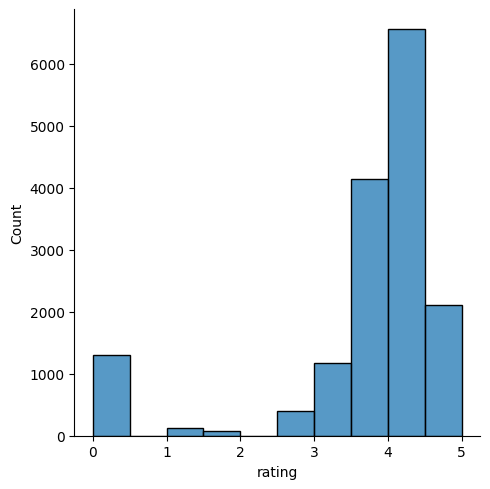

In [75]:
import seaborn as sns
sns.displot(df["rating"], kde=False, bins=10)

(0.0, 5000.0)

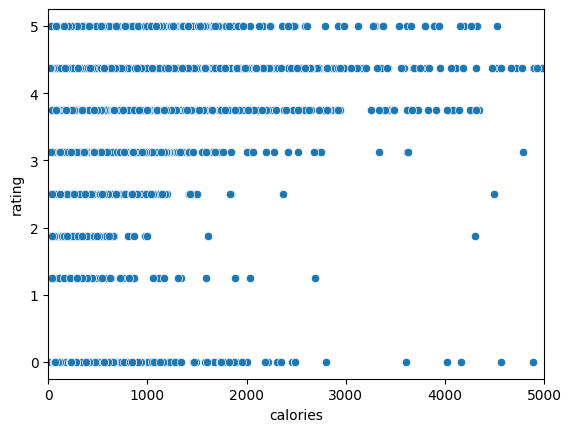

In [92]:
sns.scatterplot(df,x="calories",y="rating")
plt.xlim(0,5000)

In [99]:
unique_rating = df["rating"].unique()
df["calories"]


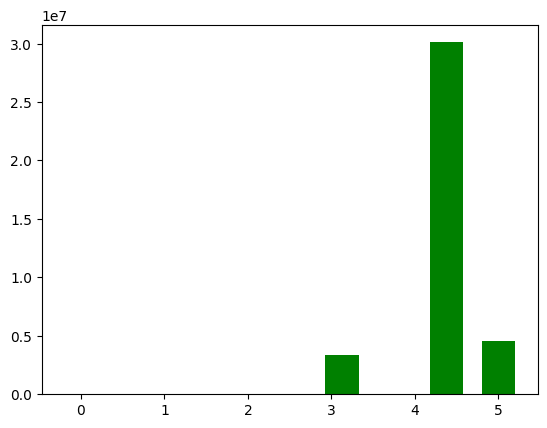

In [94]:
fig, ax = plt.subplots() 
bars=ax.bar(unique_rating,  , width=0.4, color="g")